In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import linear_model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
start = pd.read_csv("C:/Users/Tejal/Desktop/AS5 MLR/50_Startups.csv")

In [5]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: >

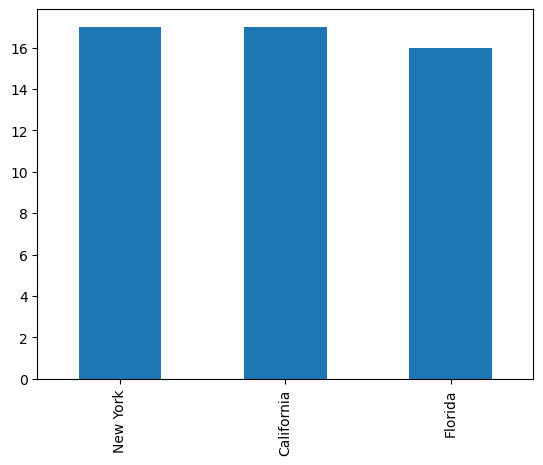

In [7]:
start['State'].value_counts().plot.bar()

In [8]:
df = start.drop('State',axis = 1)

In [9]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [12]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


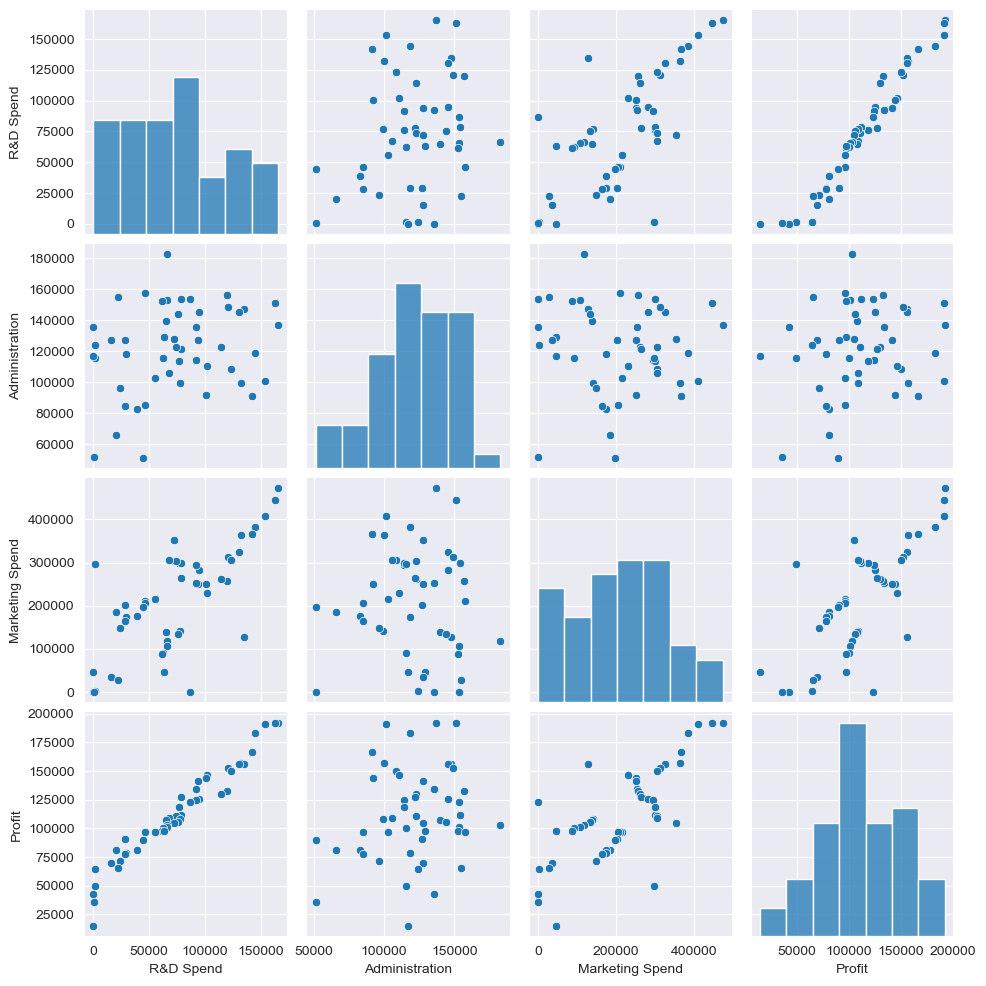

In [13]:
sns.set_style(style = 'darkgrid')
sns.pairplot(df)

<Axes: >

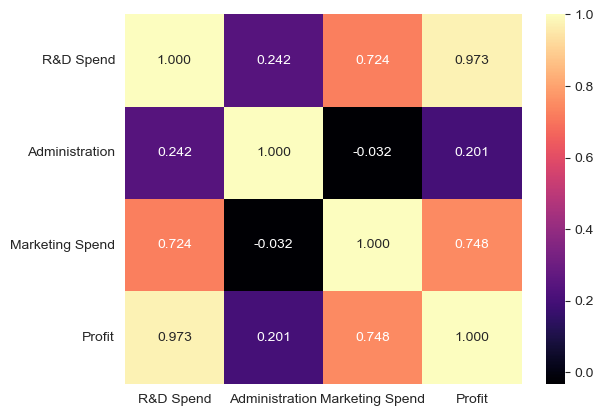

In [14]:
sns.heatmap(df.corr(), cmap = 'magma',annot = True,fmt = '.3f')

<Axes: xlabel='Profit', ylabel='Marketing Spend'>

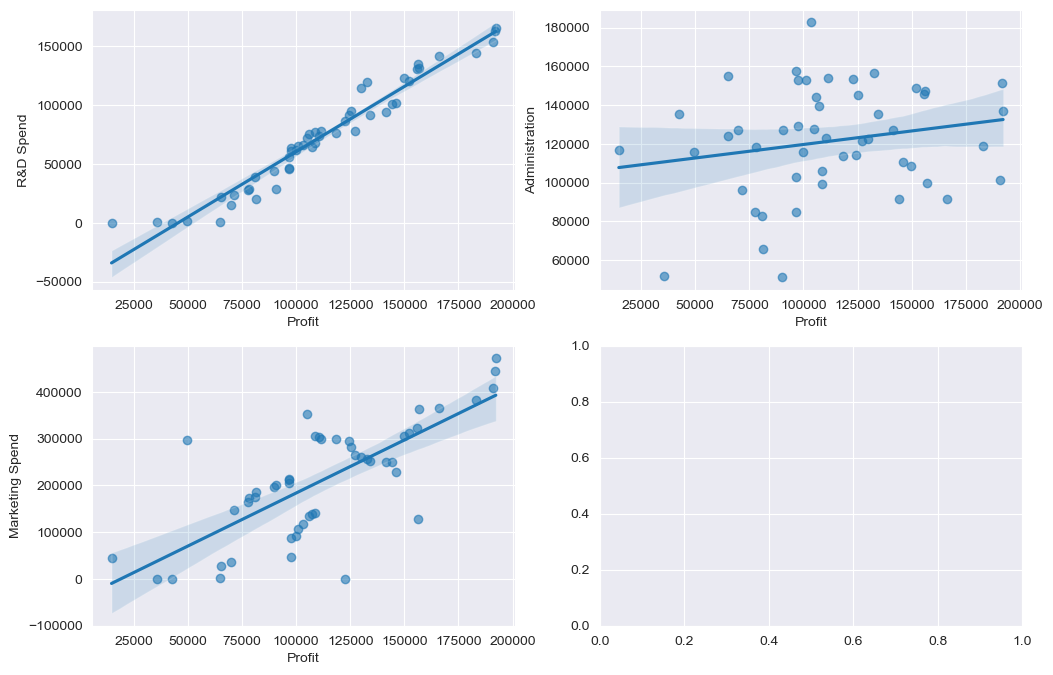

In [15]:
f,axes = plt.subplots(2, 2, figsize=(12,8))
sns.regplot(x = 'Profit', y = 'R&D Spend', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Profit', y = 'Administration', data = df, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing Spend', data = df, scatter_kws={'alpha':0.6}, ax = axes[1,0])


In [16]:
###### model building using SkLearn

In [17]:
x = df.iloc[:,0:3]

In [18]:
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [19]:
y = df.iloc[:,3]

In [20]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [21]:
###lr = LinearRegression()

In [22]:
model = linear_model.LinearRegression() 


In [23]:
model.fit(x,y)

LinearRegression()

In [24]:
##lr.fit(x,y)

In [25]:
model.score(x,y)

0.9507459940683246

In [26]:
##lr.summary()

In [27]:
model.rank_

3

In [28]:
model.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [29]:
model.intercept_

50122.19298986524

In [30]:
r2_score(y,model.predict(x))

0.9507459940683246

In [31]:
startup_new=pd.DataFrame({"R&D Spend":152200,"Administration":155300,"Marketing Spend":472000},index=[1]) 
model.predict(startup_new)
print("The profit will be:",model.predict(startup_new)) 	


The profit will be: [181439.15028132]


In [32]:
startup_new

,R&D Spend,Administration,Marketing Spend
1,152200,155300,472000


In [33]:
#####  Using stats.ols

In [34]:
import statsmodels.formula.api as smf


In [35]:
d1=df.rename({'Marketing Spend':'M_Spend'},axis=1)
d2=d1.rename({'R&D Spend':'R_Spend'},axis=1)


In [36]:
d2

,R_Spend,Administration,M_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [37]:
model2 = smf.ols('Profit~R_Spend+Administration+M_Spend',data = d2).fit()


In [38]:
model2

In [39]:
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        00:02:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
####test for normality of Residuals (Q-Q Plot)

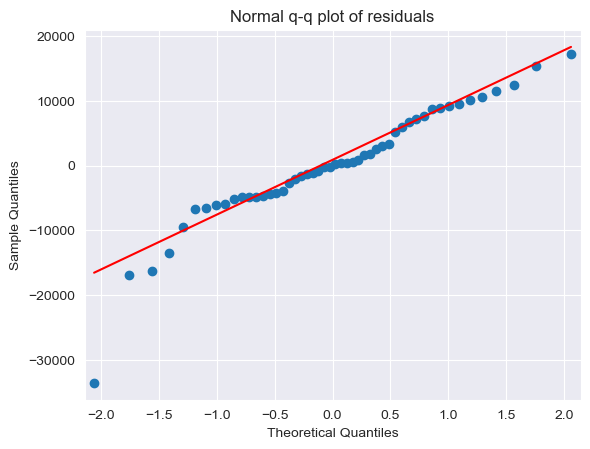

In [41]:
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line='q')
plt.title('Normal q-q plot of residuals')
plt.show()

In [42]:
##### residuals plot for Homosedasticity

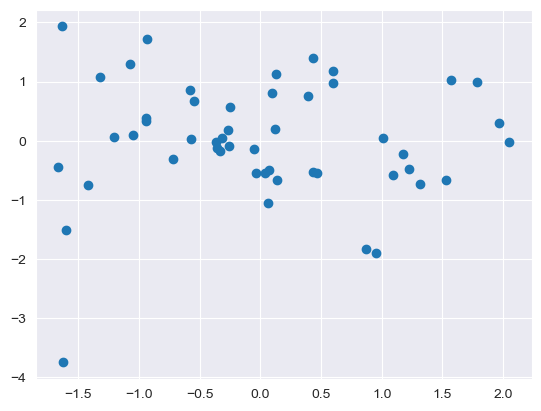

In [46]:
def std( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(std(model2.fittedvalues),
            std(model2.resid))

In [47]:
##### residuals vs regressors

eval_env: 1


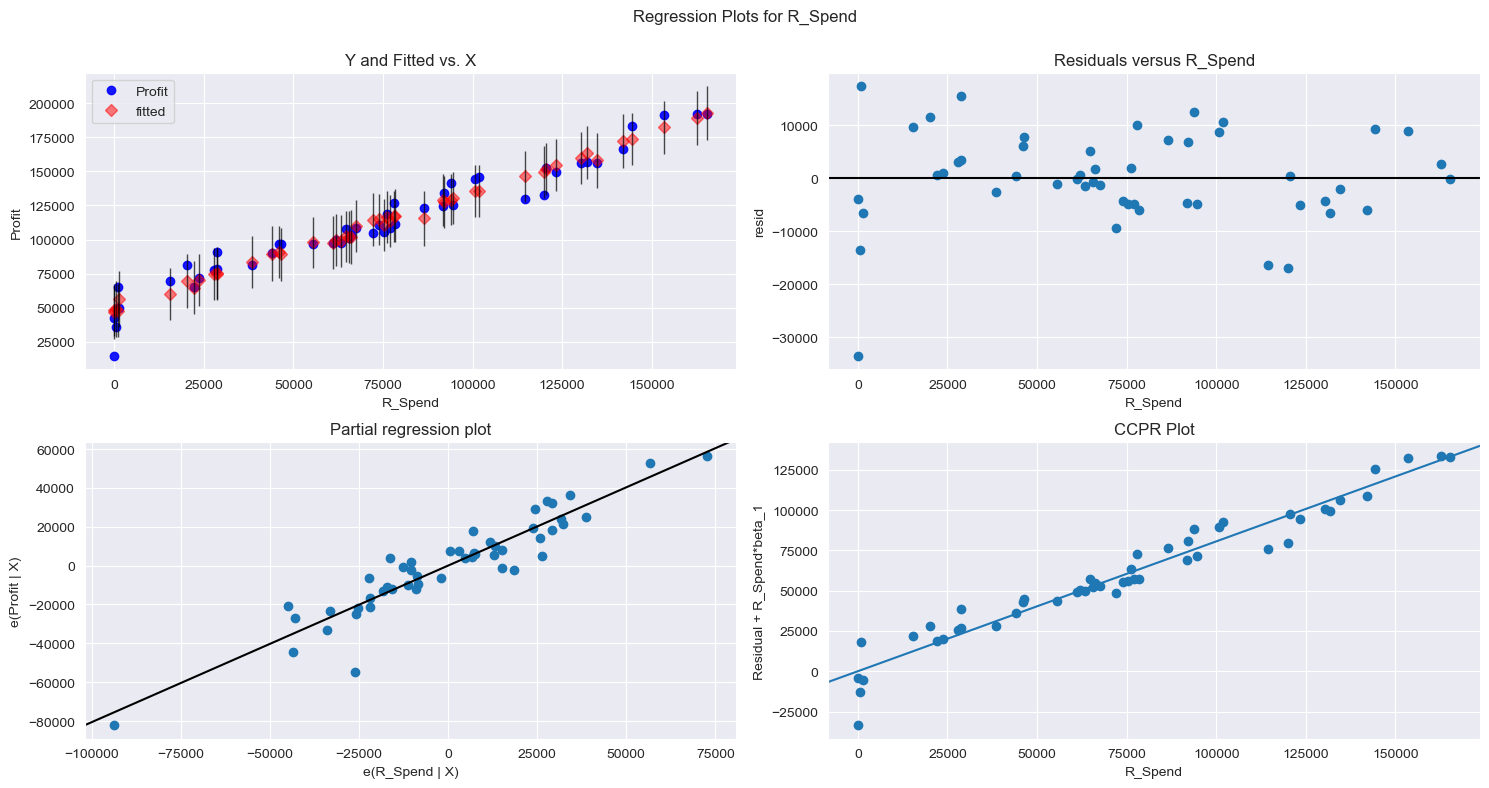

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"R_Spend",fig=fig)
plt.show()

eval_env: 1


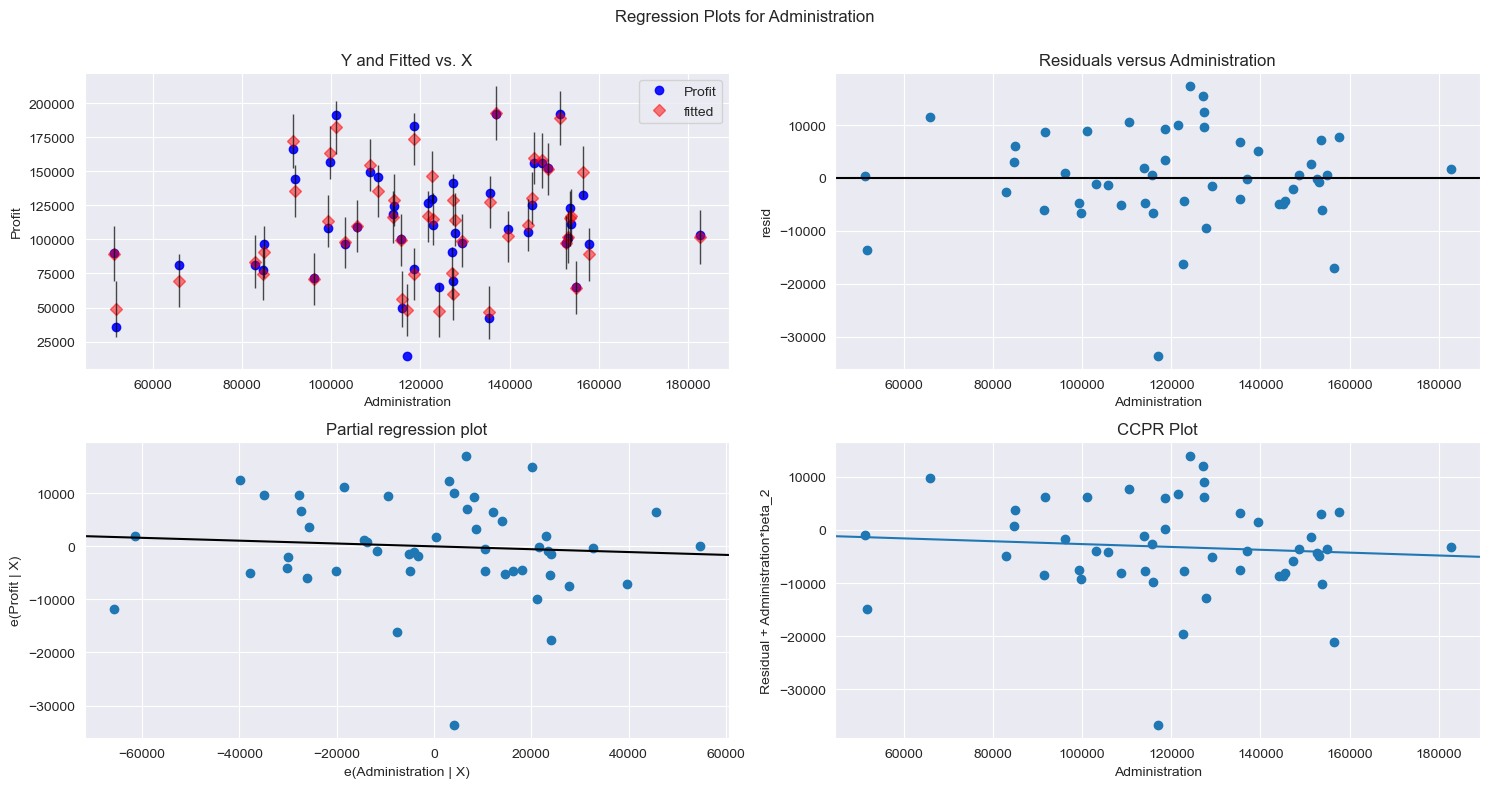

In [50]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2,"Administration",fig=fig)
plt.show()

eval_env: 1


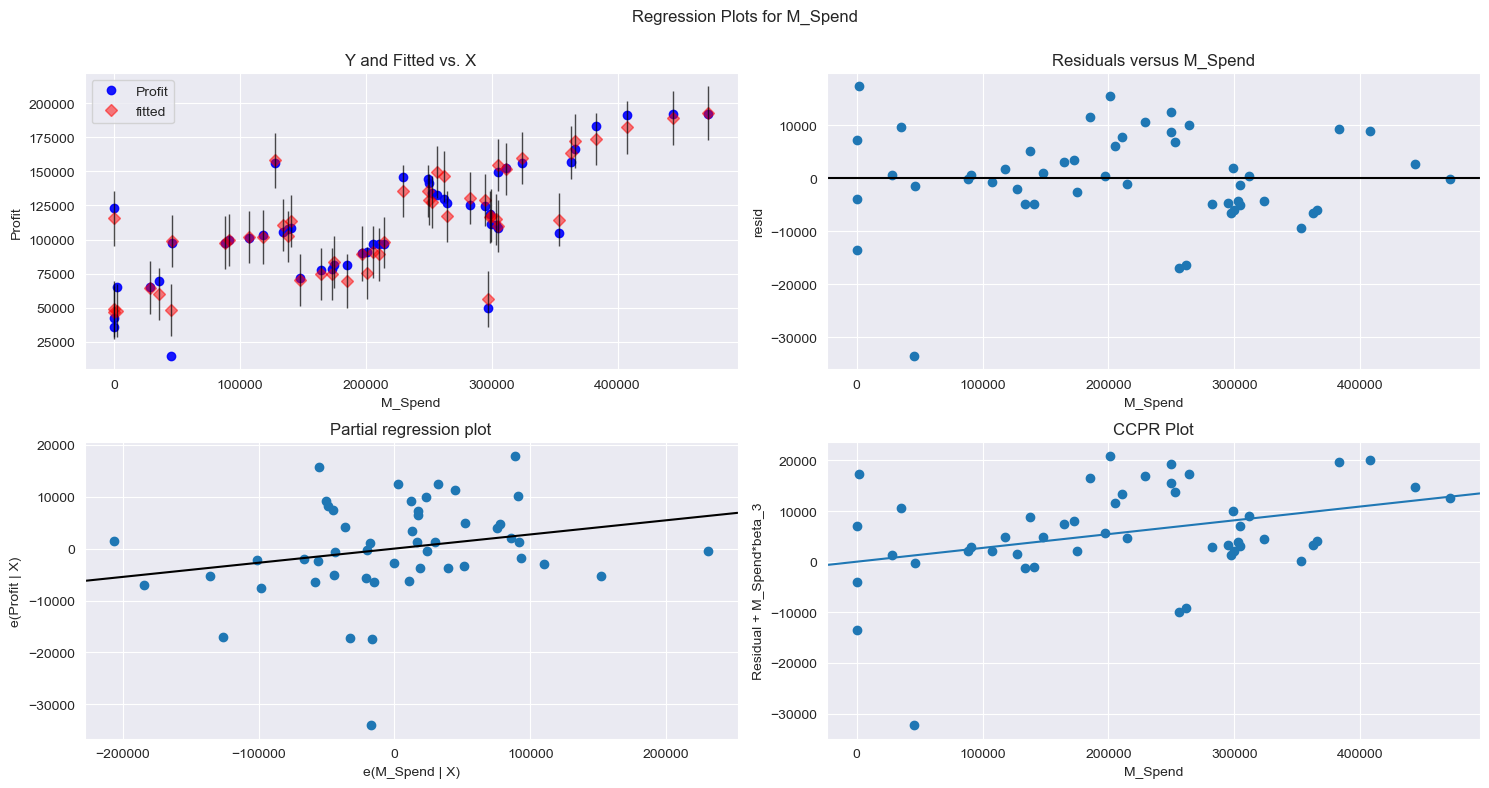

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "M_Spend", fig = fig)
plt.show()

In [55]:
#### Model Deletion Diagnostics
#### Detecting outliers

In [65]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

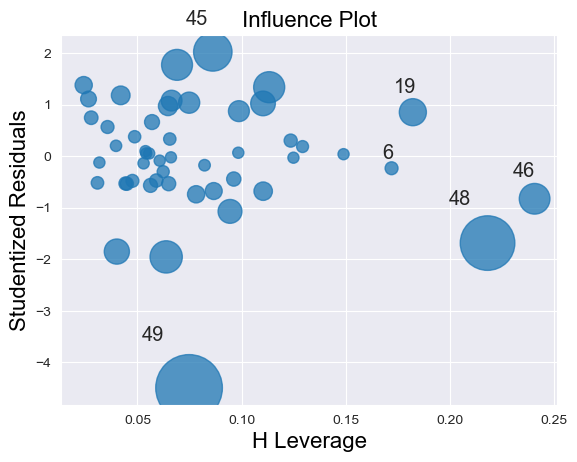

In [67]:
influence_plot(model2)
plt.show()

In [68]:
### index and value of influencer where c is more than .5

In [70]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

Since the value is < 1 ,we dont need to do the diagnostic process and finalize the model 

In [72]:
model2.rsquared,model2.aic

(0.9507459940683246, 1058.7714985998055)

In [73]:
model2.params

Intercept         50122.192990
R_Spend               0.805715
Administration       -0.026816
M_Spend               0.027228
dtype: float64

Inference: Y = 50122.2 +0.80571505X1 -0.02681597X2 +0.02722806X3 is best suited model.